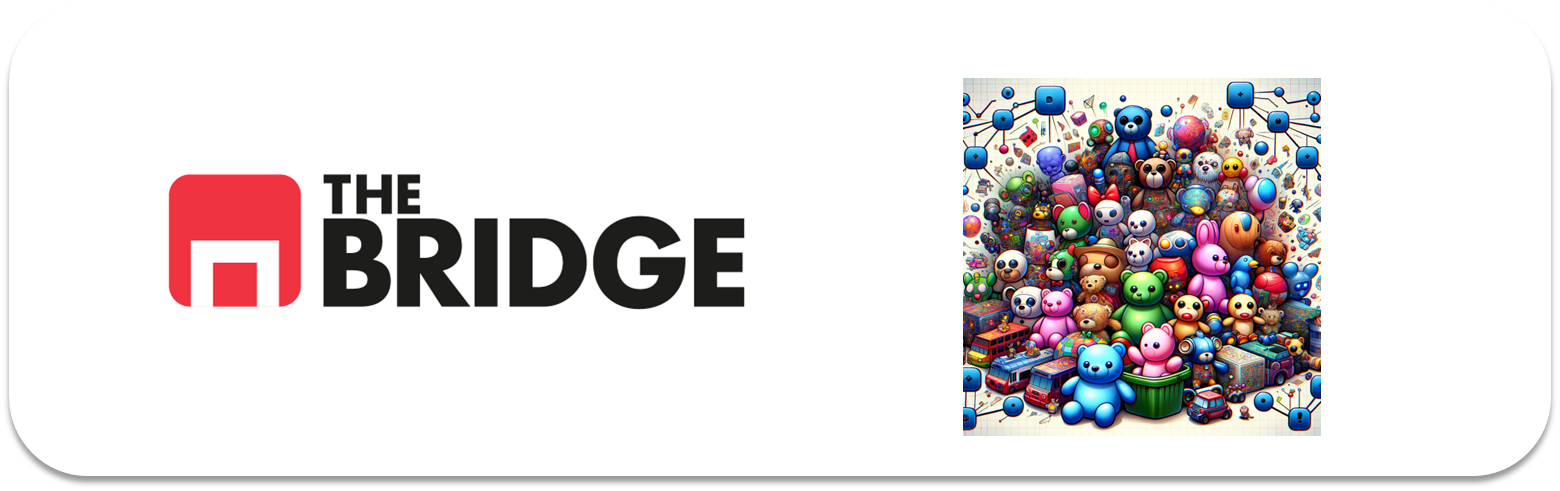

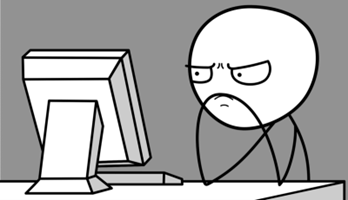

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import MinMaxScaler

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [3]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

# Cargar el dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data  # 400 imágenes aplanadas (4096 features cada una)
y = data.target  # Etiquetas de las 40 personas

# Dimensiones del dataset
print(f"Shape de las imágenes aplanadas: {X.shape}")
print(f"Shape de las etiquetas: {y.shape}")


Shape de las imágenes aplanadas: (400, 4096)
Shape de las etiquetas: (400,)


### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [5]:
from sklearn.datasets import fetch_olivetti_faces

# Cargar el dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data  # Imágenes aplanadas
y = data.target  # Etiquetas de las personas

# Mostrar las etiquetas únicas del target
print("Etiquetas únicas en el target:", sorted(set(y)))
print("Primeras 10 etiquetas del target:", y[:10])


Etiquetas únicas en el target: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Primeras 10 etiquetas del target: [20 28  3 21  9  8 32  9 26 12]


In [7]:


# Crear un dataframe con las imágenes (X) y el target (y)
df = pd.DataFrame(X)  # Cada pixel es una columna
df['target'] = y  # Añadir el target como una columna adicional

# Mostrar las primeras filas del dataframe
print(df.head())


          0         1         2         3         4         5         6  \
0  0.198347  0.235537  0.351240  0.409091  0.421488  0.429752  0.500000   
1  0.185950  0.128099  0.115702  0.132231  0.185950  0.268595  0.433884   
2  0.508264  0.603306  0.619835  0.628099  0.657025  0.665289  0.690083   
3  0.136364  0.140496  0.185950  0.280992  0.318182  0.363636  0.409091   
4  0.652893  0.644628  0.652893  0.706612  0.714876  0.719008  0.743802   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.528926  0.524793  0.553719  ...  0.508264  0.524793  0.504132  0.483471   
1  0.541322  0.570248  0.586777  ...  0.396694  0.409091  0.301653  0.421488   
2  0.727273  0.743802  0.768595  ...  0.301653  0.305785  0.314050  0.326446   
3  0.417355  0.438017  0.454545  ...  0.169421  0.206612  0.276859  0.355372   
4  0.747934  0.747934  0.756198  ...  0.074380  0.074380  0.082645  0.082645   

       4091      4092      4093      4094      4095  target  
0  0.4

In [8]:
# Reordenar aleatoriamente las filas del dataframe
df_randomized = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostrar las primeras filas del dataframe reordenado
print(df_randomized.head())


          0         1         2         3         4         5         6  \
0  0.252066  0.231405  0.276859  0.417355  0.433884  0.669421  0.834711   
1  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
2  0.723140  0.710744  0.714876  0.731405  0.735537  0.752066  0.772727   
3  0.652893  0.690083  0.677686  0.690083  0.714876  0.743802  0.747934   
4  0.409091  0.590909  0.657025  0.681818  0.694215  0.731405  0.760331   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.859504  0.871901  0.871901  ...  0.508264  0.268595  0.140496  0.165289   
1  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   
2  0.793388  0.814050  0.834711  ...  0.904959  0.549587  0.409091  0.491736   
3  0.735537  0.710744  0.681818  ...  0.152893  0.140496  0.086777  0.111570   
4  0.785124  0.776860  0.785124  ...  0.276859  0.314050  0.268595  0.247934   

       4091      4092      4093      4094      4095  target  
0  0.1

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

1. Primer Split: Train (80%) y Test-Validation (20%)

In [10]:
from sklearn.model_selection import train_test_split

# Primer split: 80% para entrenamiento, 20% para test y validación
X_train, X_temp, y_train, y_temp = train_test_split(
    df_randomized.drop("target", axis=1),  # Features
    df_randomized["target"],              # Target
    test_size=0.2,                        # 20% para test y validación
    stratify=df_randomized["target"],     # Estratificación
    random_state=42                       # Reproducibilidad
)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Temp shape (test+validación): {X_temp.shape}, {y_temp.shape}")



Train shape: (320, 4096), (320,)
Temp shape (test+validación): (80, 4096), (80,)


2. Segundo Split: Validation (10%) y Test (10%)

In [11]:
# Segundo split: 50% de X_temp para validación, 50% para test (10% del total cada uno)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, 
    y_temp, 
    test_size=0.5,                        # División equitativa (10% y 10%)
    stratify=y_temp,                      # Estratificación
    random_state=42                       # Reproducibilidad
)

print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")


Validation shape: (40, 4096), (40,)
Test shape: (40, 4096), (40,)


### #1.4

Crea los pares X,y para train, validation y test.

In [12]:
# Crear pares X (features) e y (target) para cada conjunto

# Conjunto de entrenamiento
X_train = X_train.values  # Convertir a array si es necesario
y_train = y_train.values  # Convertir a array si es necesario

# Conjunto de validación
X_val = X_val.values
y_val = y_val.values

# Conjunto de prueba
X_test = X_test.values
y_test = y_test.values

# Verificar las dimensiones de cada conjunto
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (320, 4096), y_train shape: (320,)
X_val shape: (40, 4096), y_val shape: (40,)
X_test shape: (40, 4096), y_test shape: (40,)


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [13]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

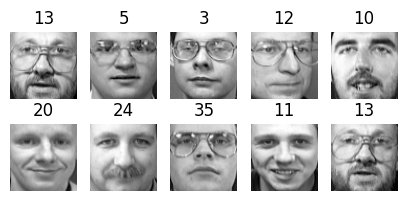

In [14]:
# Seleccionar un subconjunto de imágenes y etiquetas usando iloc
X_subset = X_train[:10, :]  # Primeras 10 imágenes del conjunto de entrenamiento
y_subset = y_train[:10]    # Primeras 10 etiquetas correspondientes

# Visualizar las caras con la función
plot_faces(X_subset, y_subset)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [19]:
from sklearn.decomposition import PCA

# Inicializar PCA para conservar el 99% de la varianza
pca = PCA(0.99)

# Aplicar PCA al conjunto de entrenamiento y transformar los demás conjuntos
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)  # Corregido: usar X_val
X_test_pca = pca.transform(X_test)

# Mostrar el número de componentes principales retenidos
print(f"Número de componentes principales retenidos: {pca.n_components_}")


Número de componentes principales retenidos: 220


In [20]:
from sklearn.decomposition import PCA

# Inicializamos PCA para conservar el 99% de la varianza
pca = PCA(0.99)

# Aplicamos PCA al conjunto de entrenamiento y transformamos los demás conjuntos
X_train_pca = pca.fit_transform(X_train)  # PCA ajustado al conjunto de entrenamiento
X_valid_pca = pca.transform(X_val)        # Transformación al conjunto de validación
X_test_pca = pca.transform(X_test)        # Transformación al conjunto de prueba

# Mostramos el número de componentes principales retenidos
print(f"Número de componentes principales retenidos: {pca.n_components_}")


Número de componentes principales retenidos: 220


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [21]:
# Rango de valores de K
k_values = range(5, 151, 5)  # De 5 en 5 hasta 150
silhouette_scores = []  # Lista para almacenar los scores de silueta



In [22]:
# Calcular el score de silueta para cada valor de K
for k in k_values:
    # Inicializar K-Means con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    
    # Calcular el score de silueta
    score = silhouette_score(X_train_pca, cluster_labels)
    silhouette_scores.append(score)
    
    # Imprimir progreso (opcional)
    print(f"K: {k}, Silhouette Score: {score:.4f}")


K: 5, Silhouette Score: 0.1051
K: 10, Silhouette Score: 0.0990
K: 15, Silhouette Score: 0.0881
K: 20, Silhouette Score: 0.1043
K: 25, Silhouette Score: 0.1147
K: 30, Silhouette Score: 0.1333
K: 35, Silhouette Score: 0.1472
K: 40, Silhouette Score: 0.1478
K: 45, Silhouette Score: 0.1600
K: 50, Silhouette Score: 0.1610
K: 55, Silhouette Score: 0.1814
K: 60, Silhouette Score: 0.1814
K: 65, Silhouette Score: 0.1818
K: 70, Silhouette Score: 0.1889
K: 75, Silhouette Score: 0.2006
K: 80, Silhouette Score: 0.1985
K: 85, Silhouette Score: 0.1975
K: 90, Silhouette Score: 0.1909
K: 95, Silhouette Score: 0.1931
K: 100, Silhouette Score: 0.1935
K: 105, Silhouette Score: 0.1999
K: 110, Silhouette Score: 0.2047
K: 115, Silhouette Score: 0.2085
K: 120, Silhouette Score: 0.2080
K: 125, Silhouette Score: 0.2097
K: 130, Silhouette Score: 0.2103
K: 135, Silhouette Score: 0.2134
K: 140, Silhouette Score: 0.2141
K: 145, Silhouette Score: 0.2145
K: 150, Silhouette Score: 0.2021


In [23]:
# Obtener el k con el mejor score de silueta
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f"El mejor K es: {best_k} con un Silhouette Score de: {best_score:.4f}")


El mejor K es: 145 con un Silhouette Score de: 0.2145


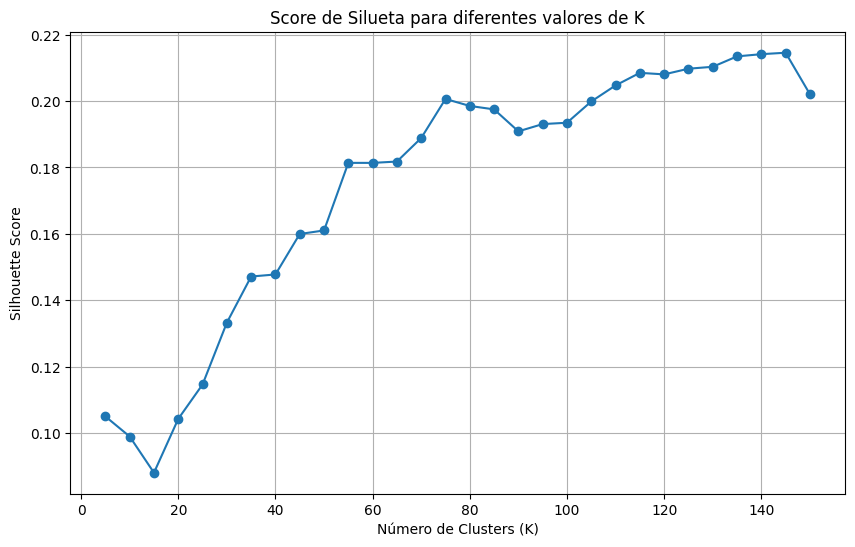

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Score de Silueta para diferentes valores de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


El gráfico sugiere que la puntuación de la silueta mejora progresivamente con valores de K más altos, alcanzando su punto máximo cerca de K=60. Después de este valor, las variaciones en el score se estabilizan, indicando que aumentar el número de clusters aporta menos beneficio significativo. Por lo tanto, K=60 parece ser una elección óptima para el clustering según esta métrica

### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

In [25]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores para K
k_values = range(5, 151, 5)  # K de 5 a 150 en pasos de 5
inertias = []  # Lista para almacenar las inercias


In [26]:
# Calcular la inercia para cada valor de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)  # Ajustar K-Means al conjunto reducido
    inertias.append(kmeans.inertia_)  # Guardar la inercia
    
    # Imprimir progreso (opcional)
    print(f"K: {k}, Inercia: {kmeans.inertia_:.2f}")


K: 5, Inercia: 16942.03
K: 10, Inercia: 14781.61
K: 15, Inercia: 13539.38
K: 20, Inercia: 12386.83
K: 25, Inercia: 11592.04
K: 30, Inercia: 10531.27
K: 35, Inercia: 9633.52
K: 40, Inercia: 9209.84
K: 45, Inercia: 8547.61
K: 50, Inercia: 8049.78
K: 55, Inercia: 7434.86
K: 60, Inercia: 7072.41
K: 65, Inercia: 6733.43
K: 70, Inercia: 6339.07
K: 75, Inercia: 5946.88
K: 80, Inercia: 5687.31
K: 85, Inercia: 5395.60
K: 90, Inercia: 5194.92
K: 95, Inercia: 4920.47
K: 100, Inercia: 4666.53
K: 105, Inercia: 4393.45
K: 110, Inercia: 4117.67
K: 115, Inercia: 3917.87
K: 120, Inercia: 3714.48
K: 125, Inercia: 3483.51
K: 130, Inercia: 3262.49
K: 135, Inercia: 3062.40
K: 140, Inercia: 2892.59
K: 145, Inercia: 2721.37
K: 150, Inercia: 2660.04


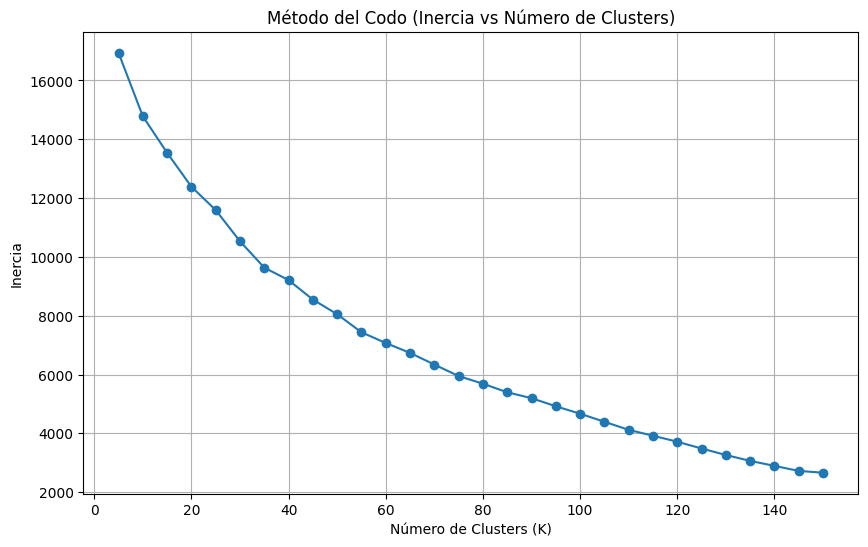

In [27]:
# Gráfica del método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Método del Codo (Inercia vs Número de Clusters)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


El gráfico del método del codo muestra una disminución rápida de la inercia al aumentar el número de clusters (K) hasta cierto punto, seguido de una reducción más lenta. El "punto de codo" parece ubicarse alrededor de K=50, donde la pendiente cambia significativamente. Este valor sugiere un equilibrio entre la complejidad del modelo y una buena representación de los datos.

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [29]:
from sklearn.cluster import KMeans

# Crear y ajustar el modelo con el mejor K obtenido (K=60)
best_k = 60  # Valor óptimo obtenido del score de silueta
best_model = KMeans(n_clusters=best_k, random_state=42)
best_model.fit(X_train_pca)

# Verificar los resultados
print("Modelo K-Means ajustado con K =", best_k)


Modelo K-Means ajustado con K = 60


### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

Cluster 0: mostrando hasta 10 caras


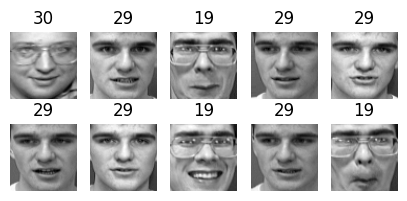

Cluster 1: mostrando hasta 10 caras


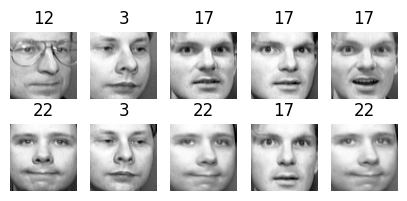

Cluster 2: mostrando hasta 10 caras


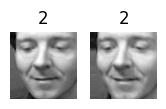

Cluster 3: mostrando hasta 10 caras


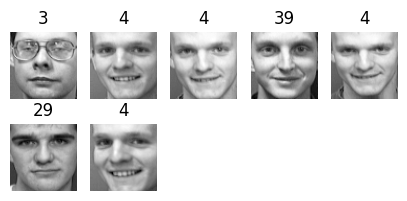

Cluster 4: mostrando hasta 10 caras


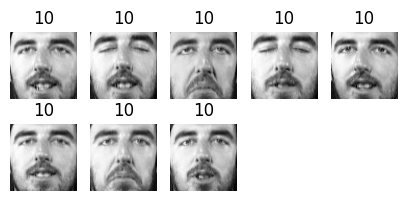

Cluster 5: mostrando hasta 10 caras


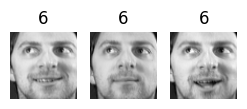

Cluster 6: mostrando hasta 10 caras


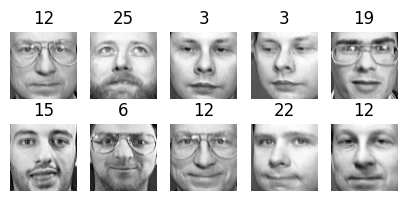

Cluster 7: mostrando hasta 10 caras


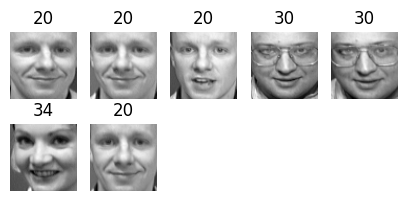

Cluster 8: mostrando hasta 10 caras


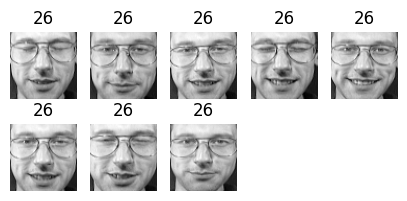

Cluster 9: mostrando hasta 10 caras


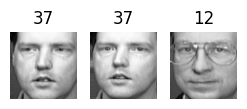

In [30]:
import numpy as np

# Etiquetas de los clusters asignadas por el modelo
cluster_labels = best_model.labels_

# Número de clusters a visualizar
num_clusters_to_plot = 10

# Crear la función adaptada para mostrar las caras de los clusters
def plot_clusters_faces(X_original, labels, cluster_labels, num_clusters=10):
    """
    X_original: Matriz original de features (imágenes en 4096 features)
    labels: Etiquetas originales de las imágenes
    cluster_labels: Etiquetas asignadas por el modelo de clustering
    num_clusters: Número de clusters a visualizar
    """
    for cluster_id in range(num_clusters):
        # Filtrar las imágenes que pertenecen al cluster actual
        cluster_faces = X_original[cluster_labels == cluster_id]
        cluster_labels_faces = labels[cluster_labels == cluster_id]
        
        # Mostrar hasta 10 caras del cluster actual
        print(f"Cluster {cluster_id}: mostrando hasta 10 caras")
        plot_faces(cluster_faces[:10], cluster_labels_faces[:10])

# Asegurarse de que las imágenes se visualicen correctamente usando X_train_original
# Donde `X_train_original` contiene las features originales (sin PCA aplicado)
plot_clusters_faces(X_train, y_train, cluster_labels, num_clusters=num_clusters_to_plot)


## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo Random Forest con 150 estimadores
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_val_pred = rf_model.predict(X_val)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en el conjunto de validación: {accuracy:.4f}")

# Mostrar un informe detallado de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_val, y_val_pred))


Accuracy en el conjunto de validación: 0.9750

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
        

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reducir la dimensionalidad: usar las distancias a los centroides como features
X_train_reduced = best_model.transform(X_train_pca)
X_val_reduced = best_model.transform(X_val_pca)
X_test_reduced = best_model.transform(X_test_pca)

# Entrenar un Random Forest sobre el dataset reducido
rf_model_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

# Predecir en el conjunto de validación
y_val_pred_reduced = rf_model_reduced.predict(X_val_reduced)

# Evaluar el modelo en el conjunto de validación
accuracy_reduced = accuracy_score(y_val, y_val_pred_reduced)
print(f"Accuracy en el conjunto de validación (dataset reducido): {accuracy_reduced:.4f}")

# Reporte de clasificación detallado
print("\nReporte de clasificación (dataset reducido):")
print(classification_report(y_val, y_val_pred_reduced))


Accuracy en el conjunto de validación (dataset reducido): 0.8250

Reporte de clasificación (dataset reducido):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00 

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

In [33]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Rango de valores de K para probar
k_values = range(10, 151, 10)
best_k = None
best_accuracy = 0

# Diccionario para almacenar los resultados
results = {}

# Iterar sobre distintos valores de K
for k in k_values:
    # Entrenar K-Means con el conjunto de entrenamiento reducido
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)

    # Reducir dimensionalidad: usar las distancias a los centroides como features
    X_train_reduced = kmeans.transform(X_train_pca)
    X_val_reduced = kmeans.transform(X_val_pca)
    X_test_reduced = kmeans.transform(X_test_pca)

    # Entrenar Random Forest con las nuevas features
    rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
    rf_model.fit(X_train_reduced, y_train)

    # Predecir y evaluar en el conjunto de validación
    y_val_pred = rf_model.predict(X_val_reduced)
    accuracy = accuracy_score(y_val, y_val_pred)

    # Guardar el resultado actual
    results[k] = accuracy
    print(f"K: {k}, Accuracy: {accuracy:.4f}")

    # Actualizar el mejor valor de K y su rendimiento
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

# Mostrar el mejor K y su Accuracy
print(f"\nMejor K: {best_k} con un Accuracy de: {best_accuracy:.4f}")


K: 10, Accuracy: 0.5250
K: 20, Accuracy: 0.6500
K: 30, Accuracy: 0.7000
K: 40, Accuracy: 0.8000
K: 50, Accuracy: 0.7750
K: 60, Accuracy: 0.8250
K: 70, Accuracy: 0.8500
K: 80, Accuracy: 0.8500
K: 90, Accuracy: 0.8500
K: 100, Accuracy: 0.8500
K: 110, Accuracy: 0.8250
K: 120, Accuracy: 0.7750
K: 130, Accuracy: 0.8250
K: 140, Accuracy: 0.8250
K: 150, Accuracy: 0.8500

Mejor K: 70 con un Accuracy de: 0.8500


 Conclusion

El análisis muestra que K=70 ofrece el mejor equilibrio, alcanzando una precisión del 85% en el conjunto de validación. Aunque valores más altos de K (como 80, 90, 100 o 150) producen el mismo rendimiento, K=70 es preferible por su simplicidad y menor complejidad computacional. Esto indica que las distancias a 70 centroides capturan patrones relevantes para el clasificador.